# Convolutional Neural Networks

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
%matplotlib inline

# 1a. Loading Dataset

In [139]:
keras.__version__

'2.7.0'

In [140]:
from keras.datasets import mnist
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

In [141]:
train_X.shape

(60000, 28, 28)

In [142]:
train_Y.shape

(60000,)

In [143]:
test_X.shape

(10000, 28, 28)

In [144]:
test_Y.shape

(10000,)

Text(0.5, 1.0, 'Test sample')

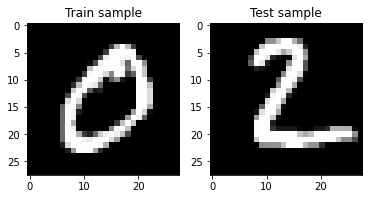

In [145]:
plt.subplot(1, 2, 1)
plt.imshow(train_X[1, :].reshape(28,28), cmap = cm.Greys_r)
plt.title('Train sample')
plt.subplot(1, 2, 2)
plt.imshow(test_X[1, :].reshape(28,28), cmap = cm.Greys_r)
plt.title('Test sample')

<Figure size 576x1152 with 0 Axes>

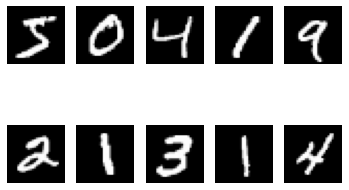

In [146]:
plt.figure(figsize=(8,16))
_, axes = plt.subplots(2, 5)
for ax, digit in zip(axes.flatten(), train_X[:10]):
    ax.set_axis_off()
    ax.imshow(digit, cmap=plt.cm.Greys_r)

<Figure size 576x1152 with 0 Axes>

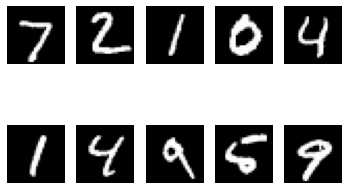

In [147]:
plt.figure(figsize=(8,16))
_, axes = plt.subplots(2, 5)
for ax, digit in zip(axes.flatten(), test_X[:10]):
    ax.set_axis_off()
    ax.imshow(digit, cmap=plt.cm.Greys_r)

# 1b. Preprocessing

In [148]:
def mnist_preprocess_X(X):
    X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
    X = X.astype('float32')
    X = X/255
    return X

In [149]:
def mnist_preprocess_Y(Y):
    Y = tf.keras.utils.to_categorical(Y, num_classes=10, dtype='float32')
    return Y

In [150]:
train_X = mnist_preprocess_X(train_X)
test_X = mnist_preprocess_X(test_X)

<Figure size 576x1152 with 0 Axes>

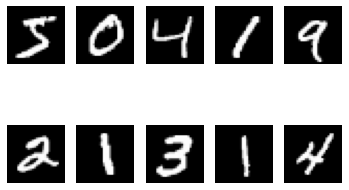

In [151]:
# Visualize same images from train set after scaling pixel values to make sure they
# are consistent with the previous images (before scaling pixels)
plt.figure(figsize=(8,16))
_, axes = plt.subplots(2, 5)
for ax, digit in zip(axes.flatten(), train_X[:10]):
    ax.set_axis_off()
    ax.imshow(digit, cmap=plt.cm.Greys_r)

<Figure size 576x1152 with 0 Axes>

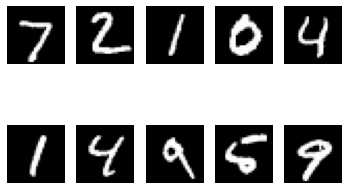

In [152]:
# Visualize same images from test set after scaling pixel values to make sure they 
# are consistent with the previous images (before scaling pixels)
plt.figure(figsize=(8,16))
_, axes = plt.subplots(2, 5)
for ax, digit in zip(axes.flatten(), test_X[:10]):
    ax.set_axis_off()
    ax.imshow(digit, cmap=plt.cm.Greys_r)

In [153]:
train_Y = mnist_preprocess_Y(train_Y)
test_Y = mnist_preprocess_Y(test_Y)

In [154]:
print(train_Y.shape)
print(test_Y.shape)

(60000, 10)
(10000, 10)


# 1c. Implementation

In [195]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
def create_cnn():
    # Define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (28,28,1)))
    # Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    # Flat ten output
    model.add(Flatten())
    # Dense layer of 100 neurons
    model.add(Dense(100, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(10, activation = 'softmax'))
    # Initialize optimizer
    opt = SGD(lr = 0.01, momentum=0.9)
    # Compile model
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [196]:
model = create_cnn()
print(model.layers)

[<keras.layers.convolutional.Conv2D object at 0x7fd9c140a890>, <keras.layers.pooling.MaxPooling2D object at 0x7fd9c1721050>, <keras.layers.core.flatten.Flatten object at 0x7fd9c16b5610>, <keras.layers.core.dense.Dense object at 0x7fd9c1689990>, <keras.layers.core.dense.Dense object at 0x7fd9c140a7d0>]


# 1d. Training and Evaluating CNN

In [197]:
model.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.1581 - accuracy: 0.9514 - val_loss: 0.0609 - val_accuracy: 0.9840
Epoch 2/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0549 - accuracy: 0.9830 - val_loss: 0.0476 - val_accuracy: 0.9873
Epoch 3/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0353 - accuracy: 0.9892 - val_loss: 0.0447 - val_accuracy: 0.9895
Epoch 4/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0233 - accuracy: 0.9934 - val_loss: 0.0394 - val_accuracy: 0.9898
Epoch 5/10
1688/1688 [==============================] - 14s 9ms/step - loss: 0.0170 - accuracy: 0.9950 - val_loss: 0.0483 - val_accuracy: 0.9898
Epoch 6/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0108 - accuracy: 0.9971 - val_loss: 0.0445 - val_accuracy: 0.9892
Epoch 7/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0076 - accuracy: 0.9983 - val_loss: 0.0478 - val_ac

In [198]:
score = model.evaluate(test_X, test_Y, verbose=0)
print(score)

[0.038164231926202774, 0.9876000285148621]


In [199]:
# Evaluate the model on the test data
print("Evaluate on test data")
results = model.evaluate(test_X, test_Y)
print("test loss, test acc:", results)

Evaluate on test data
313/313 [==============================] - 1s 3ms/step - loss: 0.0382 - accuracy: 0.9876
test loss, test acc: [0.038164231926202774, 0.9876000285148621]


# 1e. Experimentation

## i. 50 epochs

In [160]:
model2 = create_cnn()
print(model2.layers)

[<keras.layers.convolutional.Conv2D object at 0x7fd9d1d515d0>, <keras.layers.pooling.MaxPooling2D object at 0x7fd9acf8d910>, <keras.layers.core.flatten.Flatten object at 0x7fd9aca0ab90>, <keras.layers.core.dense.Dense object at 0x7fd9acd5a510>, <keras.layers.core.dense.Dense object at 0x7fd9acfb9410>]


In [161]:
epoch_history = model2.fit(train_X, train_Y, batch_size=32, epochs=50, validation_split=0.1)

Epoch 1/50
1688/1688 [==============================] - 16s 10ms/step - loss: 0.1839 - accuracy: 0.9434 - val_loss: 0.0729 - val_accuracy: 0.9777
Epoch 2/50
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0625 - accuracy: 0.9812 - val_loss: 0.0621 - val_accuracy: 0.9842
Epoch 3/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0397 - accuracy: 0.9875 - val_loss: 0.0492 - val_accuracy: 0.9880
Epoch 4/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0267 - accuracy: 0.9921 - val_loss: 0.0525 - val_accuracy: 0.9883
Epoch 5/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0189 - accuracy: 0.9943 - val_loss: 0.0617 - val_accuracy: 0.9842
Epoch 6/50
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0129 - accuracy: 0.9963 - val_loss: 0.0575 - val_accuracy: 0.9873
Epoch 7/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0087 - accuracy: 0.9978 - val_loss: 0.0487 - val_a

In [162]:
# Print validation and training accuracy over epochs
print(epoch_history.history['accuracy'])
print(epoch_history.history['val_accuracy'])

[0.9433518648147583, 0.9812036752700806, 0.9875184893608093, 0.9920740723609924, 0.9942963123321533, 0.9962962865829468, 0.9978148341178894, 0.9988148212432861, 0.9993703961372375, 0.9995740652084351, 0.9999629855155945, 0.9999629855155945, 0.9999444484710693, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9776666760444641, 0.98416668176651, 0.9879999756813049, 0.9883333444595337, 0.98416668176651, 0.987333357334137, 0.9884999990463257, 0.9881666898727417, 0.9879999756813049, 0.9886666536331177, 0.9884999990463257, 0.9890000224113464, 0.9886666536331177, 0.9890000224113464, 0.9893333315849304, 0.9893333315849304, 0.9891666769981384, 0.9888333082199097, 0.9891666769981384, 0.9891666769981384, 0.9893333315849304, 0.9891666769981384, 0.9891666769981384, 0.9891666769981384, 0.9890000224113464, 0.9891666769981384, 0.9890000224113464, 0.9890000224113464

In [163]:
epochs = [1, 10, 20, 30, 40, 50]
train_acc = np.array(epoch_history.history['accuracy'])[[0, 9, 19, 29, 39, 49]]
val_acc = np.array(epoch_history.history['val_accuracy'])[[0, 9, 19, 29, 39, 49]]

In [164]:
train_acc

array([0.94335186, 0.99957407, 1.        , 1.        , 1.        ,
       1.        ])

In [165]:
val_acc

array([0.97766668, 0.98866665, 0.98916668, 0.98933333, 0.98900002,
       0.98900002])

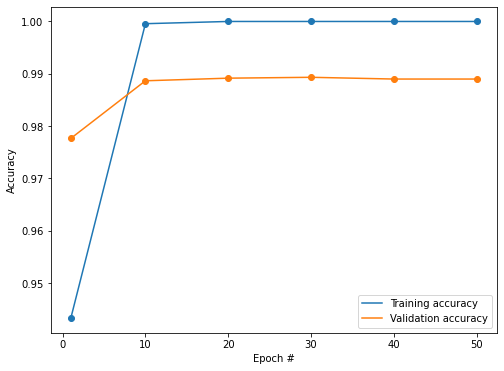

In [166]:
plt.figure(figsize=(8,6))
plt.plot(epochs, train_acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.scatter(epochs, train_acc)
plt.scatter(epochs, val_acc)
#plt.xlim(0, 50)
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend()

In [167]:
epochs_all = np.linspace(1, 50, 50, dtype='int')
train_acc_all = epoch_history.history['accuracy']
val_acc_all = epoch_history.history['val_accuracy']

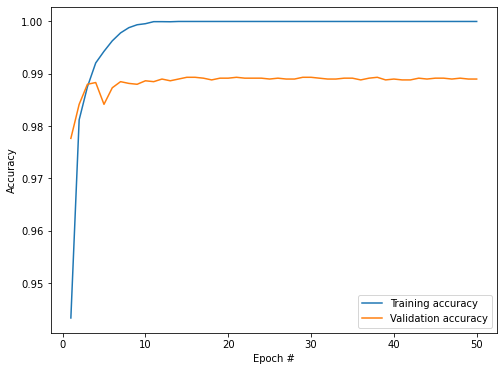

In [168]:
plt.figure(figsize=(8,6))
plt.plot(epochs_all, train_acc_all, label='Training accuracy')
plt.plot(epochs_all, val_acc_all, label='Validation accuracy')
#plt.scatter(epochs_all, train_acc_all, label='training accuracy')
#plt.scatter(epochs_all, val_acc_all, label='validation accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend()

## ii. Dropout

In [169]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
def create_cnn_drop():
    # Define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (28,28,1)))
    # Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    # Flat ten output
    model.add(Flatten())
    # Drop out a fraction of the random units
    model.add(Dropout(0.5))
    # Dense layer of 100 neurons
    model.add(Dense(100, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(10, activation = 'softmax'))
    # Initialize optimizer
    opt = SGD(lr = 0.01, momentum=0.9)
    # Compile model
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [170]:
model_drop = create_cnn_drop()
print(model_drop.layers)

[<keras.layers.convolutional.Conv2D object at 0x7fd9ad0b5810>, <keras.layers.pooling.MaxPooling2D object at 0x7fd9ad875790>, <keras.layers.core.flatten.Flatten object at 0x7fd9ad53f110>, <keras.layers.core.dropout.Dropout object at 0x7fd9ad0b5cd0>, <keras.layers.core.dense.Dense object at 0x7fd9ad1cbc90>, <keras.layers.core.dense.Dense object at 0x7fd9ad0c1cd0>]


/Users/eeshakhanna/opt/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [171]:
epoch_history_drop = model_drop.fit(train_X, train_Y, batch_size=32, epochs=50, validation_split=0.1)

Epoch 1/50
1688/1688 [==============================] - 17s 10ms/step - loss: 0.2153 - accuracy: 0.9328 - val_loss: 0.0686 - val_accuracy: 0.9805
Epoch 2/50
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0907 - accuracy: 0.9718 - val_loss: 0.0529 - val_accuracy: 0.9857
Epoch 3/50
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0676 - accuracy: 0.9786 - val_loss: 0.0542 - val_accuracy: 0.9858
Epoch 4/50
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0528 - accuracy: 0.9823 - val_loss: 0.0518 - val_accuracy: 0.9852
Epoch 5/50
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0464 - accuracy: 0.9856 - val_loss: 0.0414 - val_accuracy: 0.9888
Epoch 6/50
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0380 - accuracy: 0.9876 - val_loss: 0.0415 - val_accuracy: 0.9897
Epoch 7/50
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0330 - accuracy: 0.9891 - val_loss: 0.0421 - 

In [172]:
# Print validation and training accuracy over epochs
print(epoch_history_drop.history['accuracy'])
print(epoch_history_drop.history['val_accuracy'])

[0.9328333139419556, 0.9718148112297058, 0.9786296486854553, 0.9823148250579834, 0.9855740666389465, 0.9875555634498596, 0.9890555739402771, 0.9903518557548523, 0.9908888936042786, 0.991518497467041, 0.9927963018417358, 0.9935185313224792, 0.9937962889671326, 0.9943703413009644, 0.9950185418128967, 0.9956111311912537, 0.9953703880310059, 0.9954814910888672, 0.9954814910888672, 0.9965925812721252, 0.9962407350540161, 0.9958333373069763, 0.9969074130058289, 0.9971481561660767, 0.9969815015792847, 0.9970185160636902, 0.9971296191215515, 0.9973333477973938, 0.9974629878997803, 0.997592568397522, 0.9977777600288391, 0.9975740909576416, 0.9981296062469482, 0.9981111288070679, 0.9982222318649292, 0.9978333115577698, 0.9985370635986328, 0.9982222318649292, 0.9980185031890869, 0.9978333115577698, 0.9983333349227905, 0.9983518719673157, 0.9981111288070679, 0.9984814524650574, 0.9980555772781372, 0.9984444379806519, 0.9984259009361267, 0.998462975025177, 0.9987037181854248, 0.9984444379806519]
[0

In [173]:
train_acc_drop = np.array(epoch_history_drop.history['accuracy'])[[0, 9, 19, 29, 39, 49]]
val_acc_drop = np.array(epoch_history_drop.history['val_accuracy'])[[0, 9, 19, 29, 39, 49]]

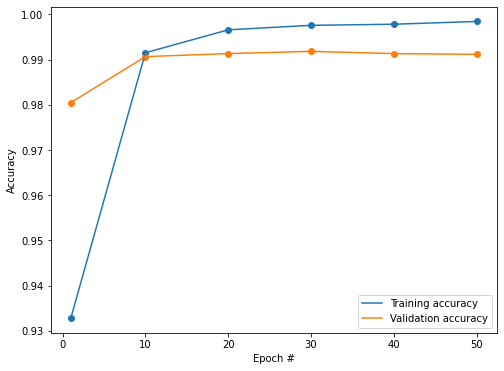

In [174]:
plt.figure(figsize=(8,6))
plt.plot(epochs, train_acc_drop, label='Training accuracy')
plt.plot(epochs, val_acc_drop, label='Validation accuracy')
plt.scatter(epochs, train_acc_drop)
plt.scatter(epochs, val_acc_drop)
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend()

In [175]:
epochs_all = np.linspace(1, 50, 50, dtype='int')
train_acc_all_drop = epoch_history_drop.history['accuracy']
val_acc_all_drop = epoch_history_drop.history['val_accuracy']

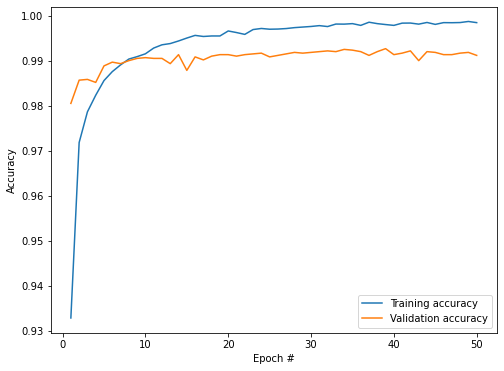

In [176]:
plt.figure(figsize=(8,6))
plt.plot(epochs_all, train_acc_all_drop, label='Training accuracy')
plt.plot(epochs_all, val_acc_all_drop, label='Validation accuracy')
#plt.scatter(epochs_all, train_acc_all, label='training accuracy')
#plt.scatter(epochs_all, val_acc_all, label='validation accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend()

## iii. Add another convolution layer and maxpooling layer

In [177]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
def create_cnn_conv_max():
    # Define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (28,28,1)))
    # Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    # Convolution layer 2
    model.add(Conv2D(64, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (28,28,1)))
    # Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    # Flat ten output
    model.add(Flatten())
    # Drop out a fraction of the random units
    model.add(Dropout(0.5))
    # Dense layer of 100 neurons
    model.add(Dense(100, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(10, activation = 'softmax'))
    # Initialize optimizer
    opt = SGD(lr = 0.01, momentum=0.9)
    # Compile model
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [178]:
model_conv_max = create_cnn_conv_max()
print(model_conv_max.layers)

[<keras.layers.convolutional.Conv2D object at 0x7fd9d497cb90>, <keras.layers.pooling.MaxPooling2D object at 0x7fd9d6f8fa10>, <keras.layers.convolutional.Conv2D object at 0x7fd9d1dc1350>, <keras.layers.pooling.MaxPooling2D object at 0x7fd9d4bd2ed0>, <keras.layers.core.flatten.Flatten object at 0x7fd9cf620c10>, <keras.layers.core.dropout.Dropout object at 0x7fd9cf620d50>, <keras.layers.core.dense.Dense object at 0x7fd9ad875c50>, <keras.layers.core.dense.Dense object at 0x7fd9ad585410>]


/Users/eeshakhanna/opt/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [179]:
epoch_history_conv_max = model_conv_max.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 28s 16ms/step - loss: 0.2022 - accuracy: 0.9361 - val_loss: 0.0517 - val_accuracy: 0.9845
Epoch 2/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0810 - accuracy: 0.9747 - val_loss: 0.0383 - val_accuracy: 0.9890
Epoch 3/10
1688/1688 [==============================] - 30s 18ms/step - loss: 0.0619 - accuracy: 0.9807 - val_loss: 0.0363 - val_accuracy: 0.9900
Epoch 4/10
1688/1688 [==============================] - 26s 15ms/step - loss: 0.0521 - accuracy: 0.9838 - val_loss: 0.0339 - val_accuracy: 0.9905
Epoch 5/10
1688/1688 [==============================] - 25s 15ms/step - loss: 0.0454 - accuracy: 0.9857 - val_loss: 0.0314 - val_accuracy: 0.9898
Epoch 6/10
1688/1688 [==============================] - 26s 16ms/step - loss: 0.0405 - accuracy: 0.9869 - val_loss: 0.0310 - val_accuracy: 0.9912
Epoch 7/10
1688/1688 [==============================] - 26s 15ms/step - loss: 0.0390 - accuracy: 0.9869 - val_loss: 0.0256 -

In [180]:
# Print validation and training accuracy over epochs
print("Evaluate on test data")
results = model_conv_max.evaluate(test_X, test_Y)
print("test loss, test acc:", results)

Evaluate on test data
313/313 [==============================] - 1s 3ms/step - loss: 0.0218 - accuracy: 0.9926
test loss, test acc: [0.021758627146482468, 0.9926000237464905]


In [188]:
# Run iteration with 2 convultion layers and no drop-off to allow for fair comparison with model 
# containing single conv layer and no dropout

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
def create_cnn_conv_max_no_dropout():
    # Define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (28,28,1)))
    # Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    # Convolution layer 2
    model.add(Conv2D(64, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (28,28,1)))
    # Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    # Flat ten output
    model.add(Flatten())
    # Dense layer of 100 neurons
    model.add(Dense(100, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(10, activation = 'softmax'))
    # Initialize optimizer
    opt = SGD(lr = 0.01, momentum=0.9)
    # Compile model
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [189]:
model_conv_max_no_dropout = create_cnn_conv_max_no_dropout()
print(model_conv_max_no_dropout.layers)

[<keras.layers.convolutional.Conv2D object at 0x7fd9ac935910>, <keras.layers.pooling.MaxPooling2D object at 0x7fd9d64622d0>, <keras.layers.convolutional.Conv2D object at 0x7fd9d54bae90>, <keras.layers.pooling.MaxPooling2D object at 0x7fd9cf609c50>, <keras.layers.core.flatten.Flatten object at 0x7fd9d51334d0>, <keras.layers.core.dense.Dense object at 0x7fd9d05320d0>, <keras.layers.core.dense.Dense object at 0x7fd9d689fa90>]


In [190]:
model_conv_max_no_dropout.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.1407 - accuracy: 0.9568 - val_loss: 0.0505 - val_accuracy: 0.9860
Epoch 2/10
1688/1688 [==============================] - 25s 15ms/step - loss: 0.0478 - accuracy: 0.9847 - val_loss: 0.0424 - val_accuracy: 0.9882
Epoch 3/10
1688/1688 [==============================] - 28s 17ms/step - loss: 0.0319 - accuracy: 0.9900 - val_loss: 0.0338 - val_accuracy: 0.9905
Epoch 4/10
1688/1688 [==============================] - 25s 15ms/step - loss: 0.0245 - accuracy: 0.9919 - val_loss: 0.0381 - val_accuracy: 0.9897
Epoch 5/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0175 - accuracy: 0.9941 - val_loss: 0.0364 - val_accuracy: 0.9908
Epoch 6/10
1688/1688 [==============================] - 26s 15ms/step - loss: 0.0133 - accuracy: 0.9956 - val_loss: 0.0474 - val_accuracy: 0.9893
Epoch 7/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0100 - accuracy: 0.9967 - val_loss: 0.0403 -

In [191]:
print("Evaluate on test data")
results = model_conv_max_no_dropout.evaluate(test_X, test_Y)
print("test loss, test acc:", results)

Evaluate on test data
313/313 [==============================] - 1s 4ms/step - loss: 0.0308 - accuracy: 0.9910
test loss, test acc: [0.03084799274802208, 0.9909999966621399]


## iv. Learning rates

In [181]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
def create_cnn_lr_low():
    # Define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (28,28,1)))
    # Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    # Convolution layer 2
    model.add(Conv2D(64, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (28,28,1)))
    # Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    # Flat ten output
    model.add(Flatten())
    # Drop out a fraction of the random units
    model.add(Dropout(0.5))
    # Dense layer of 100 neurons
    model.add(Dense(100, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(10, activation = 'softmax'))
    # Initialize optimizer
    opt = SGD(lr = 0.001, momentum=0.9)
    # Compile model
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [182]:
model_lr_low = create_cnn_lr_low()
print(model_lr_low.layers)

[<keras.layers.convolutional.Conv2D object at 0x7fd9d6a5ec50>, <keras.layers.pooling.MaxPooling2D object at 0x7fd9d4b464d0>, <keras.layers.convolutional.Conv2D object at 0x7fd9d4b8ce10>, <keras.layers.pooling.MaxPooling2D object at 0x7fd9cf6382d0>, <keras.layers.core.flatten.Flatten object at 0x7fd9d488ee90>, <keras.layers.core.dropout.Dropout object at 0x7fd9ad539ed0>, <keras.layers.core.dense.Dense object at 0x7fd9d4975e50>, <keras.layers.core.dense.Dense object at 0x7fd9d489e150>]


In [183]:
epoch_history_lr_low = model_lr_low.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 26s 15ms/step - loss: 0.4211 - accuracy: 0.8665 - val_loss: 0.1031 - val_accuracy: 0.9707
Epoch 2/10
1688/1688 [==============================] - 26s 15ms/step - loss: 0.1573 - accuracy: 0.9520 - val_loss: 0.0730 - val_accuracy: 0.9788
Epoch 3/10
1688/1688 [==============================] - 28s 17ms/step - loss: 0.1190 - accuracy: 0.9633 - val_loss: 0.0583 - val_accuracy: 0.9838
Epoch 4/10
1688/1688 [==============================] - 28s 16ms/step - loss: 0.1014 - accuracy: 0.9687 - val_loss: 0.0510 - val_accuracy: 0.9865
Epoch 5/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0912 - accuracy: 0.9717 - val_loss: 0.0489 - val_accuracy: 0.9858
Epoch 6/10
1688/1688 [==============================] - 31s 18ms/step - loss: 0.0822 - accuracy: 0.9746 - val_loss: 0.0471 - val_accuracy: 0.9867
Epoch 7/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0779 - accuracy: 0.9763 - val_loss: 0.0436 -

In [184]:
print("Evaluate on test data")
results_lr_low = model_lr_low.evaluate(test_X, test_Y)
print("test loss, test acc:", results_lr_low)

Evaluate on test data
313/313 [==============================] - 1s 3ms/step - loss: 0.0350 - accuracy: 0.9878
test loss, test acc: [0.03500775620341301, 0.9878000020980835]


In [185]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
def create_cnn_lr_high():
    # Define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (28,28,1)))
    # Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    # Convolution layer 2
    model.add(Conv2D(64, (3,3), activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (28,28,1)))
    # Maxpooling layer
    model.add(MaxPooling2D((2,2)))
    # Flat ten output
    model.add(Flatten())
    # Drop out a fraction of the random units
    model.add(Dropout(0.5))
    # Dense layer of 100 neurons
    model.add(Dense(100, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(10, activation = 'softmax'))
    # Initialize optimizer
    opt = SGD(lr = 0.1, momentum=0.9)
    # Compile model
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [186]:
model_lr_high = create_cnn_lr_high()
print(model_lr_high.layers)

[<keras.layers.convolutional.Conv2D object at 0x7fd9d05332d0>, <keras.layers.pooling.MaxPooling2D object at 0x7fd9d0532650>, <keras.layers.convolutional.Conv2D object at 0x7fd9d052c710>, <keras.layers.pooling.MaxPooling2D object at 0x7fd9cf638110>, <keras.layers.core.flatten.Flatten object at 0x7fd9d6f621d0>, <keras.layers.core.dropout.Dropout object at 0x7fd9d05327d0>, <keras.layers.core.dense.Dense object at 0x7fd9d7ac9b10>, <keras.layers.core.dense.Dense object at 0x7fd9d0533fd0>]


In [187]:
epoch_history_lr_high = model_lr_high.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 26s 15ms/step - loss: 1.0363 - accuracy: 0.7123 - val_loss: 0.6692 - val_accuracy: 0.8127
Epoch 2/10
1688/1688 [==============================] - 28s 16ms/step - loss: 1.2061 - accuracy: 0.6588 - val_loss: 0.8907 - val_accuracy: 0.7282
Epoch 3/10
1688/1688 [==============================] - 29s 17ms/step - loss: 1.4299 - accuracy: 0.5739 - val_loss: 1.4407 - val_accuracy: 0.5670
Epoch 4/10
1688/1688 [==============================] - 24s 14ms/step - loss: 1.5255 - accuracy: 0.5382 - val_loss: 1.1716 - val_accuracy: 0.6227
Epoch 5/10
1688/1688 [==============================] - 25s 15ms/step - loss: 2.2610 - accuracy: 0.1401 - val_loss: 2.3087 - val_accuracy: 0.0992
Epoch 6/10
1688/1688 [==============================] - 27s 16ms/step - loss: 2.3079 - accuracy: 0.1043 - val_loss: 2.3070 - val_accuracy: 0.1050
Epoch 7/10
1688/1688 [==============================] - 27s 16ms/step - loss: 2.3089 - accuracy: 0.1031 - val_loss: 2.3084 -

In [82]:
print("Evaluate on test data")
results_lr_high = model_lr_high.evaluate(test_X, test_Y)
print("test loss, test acc:", results_lr_high)

Evaluate on test data
313/313 [==============================] - 1s 4ms/step - loss: 2.3070 - accuracy: 0.0980
test loss, test acc: [2.3069677352905273, 0.09799999743700027]
